In [ ]:
import tkinter as tk
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tkinter import filedialog,messagebox,ttk
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
t=tk.Tk()
t.title("Machine Learning Project")
t.geometry("1350x2000+0+0")

fm1=tk.Frame(t)
fm1.pack()
fram1=tk.Label(fm1,text="Mobile Price Range Predict",font=("arial",50,"bold"),relief="ridge",bd=10)
fram1.grid(row=0,columnspan=2,pady=20)
fm2=tk.Frame(fm1,bd=10,width=1000,height=300,relief="ridge")
fm2.grid(row=2)
y1_pre=tk.DoubleVar()
y2_pre=tk.DoubleVar()
y3_pre=tk.DoubleVar()
filename=tk.IntVar()
Maxstr=tk.StringVar()
##################### variable for Frame 2 ############################
global stm

stm=[]
k11=[]
w11=[]
storeval=tk.IntVar()
strmn=""
global kl

#######################################################################
l={}
ranfo="1"
check=tk.StringVar()
########################################## Class ###########################################################
class Primary:
    y1_pre=tk.IntVar()
    def __init__(self,x_train,x_test,y_train,y_test):
        self.x_train=x_train
        self.y_train=y_train
        self.y_test=y_test
        self.x_test=x_test
    def RandomForest(self):
        self.classifi=RandomForestClassifier(n_estimators=30,criterion="entropy")
        self.classifi.fit(self.x_train,self.y_train)
        self.y_pre=self.classifi.predict(self.x_test)
        self.r2score=r2_score(self.y_test,self.y_pre)
        y1_pre.set(str(self.r2score))
        l[y1_pre.get()]="a"
        
        
    def Linerregression(self):
        self.linreg=LinearRegression()
        self.linreg.fit(self.x_train,self.y_train)
        self.y11_pre=self.linreg.predict(self.x_test)
        self.r21score=r2_score(self.y_test,self.y11_pre)
        y2_pre.set(str(self.r21score))
        l[y2_pre.get()]="b"
        
    def KnnModel(self):
        self.knnm=KNeighborsClassifier(n_neighbors=30)
        self.knnm.fit(self.x_train,self.y_train)
        self.y22_pre=self.knnm.predict(self.x_test)
        self.r31score=r2_score(self.y_test,self.y22_pre)
        y3_pre.set(str(self.r31score))
        l[y3_pre.get()]="c"
        
###################################################################################################        
def secte(fm2):
    check.set("1")
    filename=filedialog.askopenfilename(initialdir="/",title="Select file",filetypes=(("jpg file","*.jpg"),("all files","*.*")))
    data=pd.read_csv(filename)
    ############# drop data into dependent and independent ################
    x=data.drop("price_range",axis=1)
    y=data["price_range"]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    C1=Primary(x_train,x_test,y_train,y_test)
    C1.RandomForest() 
    C2=Primary(x_train,x_test,y_train,y_test)
    C2.Linerregression()
    C3=Primary(x_train,x_test,y_train,y_test)
    C3.KnnModel()
    stm.append(C1.classifi)
    stm.append(C2.linreg)
    stm.append(C3.knnm)
   
 ############################### Import file name ########################################   

###########################################################################################

############################################ Frame 2 Operation ############################

labl1=tk.Label(fm2,text="RANDOMFORST MODEL Accuracy",font=("arial",20,"bold"))
labl1.grid(row=1,column=1)

labl2=tk.Label(fm2,text="Linear MODEL Accuracy",font=("arial",20,"bold"))
labl2.grid(row=2,column=1)

labl3=tk.Label(fm2,text="KNN MODEL Accuracy",font=("arial",20,"bold"))
labl3.grid(row=3,column=1)

#labl4=tk.Label(fm2,text="KNN MODEL Accuracy",font=("arial",20,"bold"))
#labl4.grid(row=4,column=1)
###################################################### OUTPUT FOR RANDOMFOREST ########################################
def Randomfob(fm2):
    if(ranfo==check.get()):
        
        Lbl=tk.Entry(fm2,textvariable=y1_pre,font=("arial",20,"bold"),state="readonly")
        Lbl.grid(row=1,column=3)
        
    else:
        messagebox.showinfo("before predict","IMPORT FILE")
        
#############################################################################################################################

####################################### FOR Linear REGRESSION ###################################################

def LinearM(fm2):
    if(ranfo==check.get()):
        Lbl1=tk.Entry(fm2,textvariable=y2_pre,font=("arial",20,"bold"),state="readonly")
        Lbl1.grid(row=2,column=3)
        
        
    else:
        messagebox.showinfo("before predict","IMPORT FILE")
        
####################################################################################################################
######################################### FOR KNN MODEL ######################################
def KNNM(fm2):
    if(ranfo==check.get()):
        mx=l[max(l)]
        if(mx=="a"):
            strmn="a"
            Maxstr.set("RandomForests")
        elif(mx=="b"):
            strmn="b"
            Maxstr.set("Linear regression")
        else:
            strmn="c"
            Maxstr.set("K-NN Model")
        
        Lbl2=tk.Entry(fm2,textvariable=y3_pre,font=("arial",20,"bold"),state="readonly")
        Lbl2.grid(row=3,column=3)
        
    else:
        messagebox.showinfo("before predict","IMPORT FILE")
def PredictM(fm2):
    if(ranfo==check.get()):
        tk.Entry(fm2,textvariable=Maxstr,font=("arial",20,"bold"),state="readonly").grid(row=4,column=3)
    else:
        messagebox.showinfo("before predict","IMPORT FILE")    
        
##############################################################################################

fm2b=tk.Button(fm2,text="Import CSV File",command=lambda :secte(fm2),font=("arial",20,"bold"))
fm2b.grid(row=0) 
ranbutt=tk.Button(fm2,text="RandomF M",command=lambda :Randomfob(fm2),font=("arial",20,"bold")) 
ranbutt.grid(row=1,column=2)

ranbutt1=tk.Button(fm2,text="Linear M",command=lambda :LinearM(fm2),font=("arial",20,"bold")) 
ranbutt1.grid(row=2,column=2)

ranbutt2=tk.Button(fm2,text="K-NN M",command=lambda :KNNM(fm2),font=("arial",20,"bold")) 
ranbutt2.grid(row=3,column=2)

ranbutt2=tk.Button(fm2,text="Predict best Model",command=lambda :PredictM(fm2),font=("arial",20,"bold")) 
ranbutt2.grid(row=4,column=1)

######################################### Another window 2 ##################################################

fm3=tk.Frame(fm1,bd=5,width=1000,height=300)
fm3.grid(row=3,pady=20)

############################################################ windon 2 for submit features value ####################

    
def SSSubmit(k11,fm6):
    h=[]
    c=0
    for i in k11:
        if(i.get()==""):
            pass
        else:
            c+=1
            h.append(i.get())
    if(c==20):
    
        h=np.array(h,dtype=float,ndmin=2)
        if(strmn=="a"):
            inm=stm[0].predict(h)
        elif(strmn=="b"):
            inm=stm[1].predict(h)
        else:
            inm=stm[2].predict(h)
        kl=tk.StringVar()    
        kl.set(str(inm[0]))
        tk.Label(fm6,text="Price range",font=("arial",20,"bold")).grid(row=1,column=1)
        lbll86=ttk.Combobox(fm6,font=("arial",25,"bold"),state="readonly",width=10)
        lbll86["value"]=(kl.get())
        lbll86.current()
        lbll86.grid(row=1,column=2) 
        

    else:
        messagebox.showinfo("enter all values","before execute process")  
        
       
    
    
    
def Endw(tw):
    tw.destroy()
##############################################################################################################

def butnewwindow(fm3):
    tw=tk.Tk()
    
    tw.geometry("1400x1200+0+0")
    fm33=tk.Frame(tw)
    fm33.pack()
    fm31=tk.Frame(fm33,bd=10,width=1200,height=900,relief="ridge")
    fm31.grid(row=0,columnspan=2)
    header2=tk.Label(fm31,text="Plese Enter Features Value as Numeriacl format",font=("arial",30,"bold"),bd=5)
    header2.grid(row=0,pady=20,columnspan=5)
    
    fm4=tk.Frame(fm33,bd=10,width=1000,height=600,relief="ridge")
    fm4.grid(row=1,pady=40)
    #########################################
    
    ############################################ 1 ##########################################################
    lbll1=tk.Label(fm4,text="Battery_power",font=("arial",20,"bold"))
    lbll1.grid(row=1,column=0)
    elbll1=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll1.grid(row=1,column=1)
    
    
    
    tk.Label(fm4,text="Bluetooth",font=("arial",20,"bold")).grid(row=1,column=2)
    wlb1=ttk.Combobox(fm4,font=("arial",25,"bold"),state="readonly",width=10)
    wlb1["value"]=("0","1")
    wlb1.current(0)
    wlb1.grid(row=1,column=3)
    
    
    
    
    lbll2=tk.Label(fm4,text="Clock Speed",font=("arial",20,"bold"))
    lbll2.grid(row=1,column=4)
    elbll2=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll2.grid(row=1,column=5)
    

    
  ############################################### 2 #########################################################################  
    tk.Label(fm4,text="Dual Sim",font=("arial",20,"bold")).grid(row=2,column=0)
    lbll4=ttk.Combobox(fm4,font=("arial",25,"bold"),state="readonly",width=10)
    lbll4["value"]=("0","1")
    lbll4.current(0)
    lbll4.grid(row=2,column=1)
    
    
    lbll5=tk.Label(fm4,text="Front_camera",font=("arial",20,"bold"))
    lbll5.grid(row=2,column=2)
    elbll5=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll5.grid(row=2,column=3)
    
    
    
    tk.Label(fm4,text="4G",font=("arial",20,"bold")).grid(row=2,column=4)
    lbll6=ttk.Combobox(fm4,font=("arial",25,"bold"),state="readonly",width=10)
    lbll6["value"]=("0","1")
    lbll6.current(0)
    lbll6.grid(row=2,column=5)
    
 ############################################## 3 ##################################################################   
    
    lbll7=tk.Label(fm4,text="Int_Memory",font=("arial",20,"bold"))
    lbll7.grid(row=3,column=0)
    elbll7=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll7.grid(row=3,column=1)
    
    
    lbll8=tk.Label(fm4,text="Mobile_depth",font=("arial",20,"bold"))
    lbll8.grid(row=3,column=2)
    elbll8=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll8.grid(row=3,column=3)
    
    
    lbll9=tk.Label(fm4,text="mobile_weigth",font=("arial",20,"bold"))
    lbll9.grid(row=3,column=4)
    elbll9=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll9.grid(row=3,column=5)
    
 ############################################## 4 #########################################################################   
    lbll10=tk.Label(fm4,text="N-core",font=("arial",20,"bold"))
    lbll10.grid(row=4,column=0)
    elbll10=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll10.grid(row=4,column=1)
    
    
    lbll11=tk.Label(fm4,text="Primary Camera",font=("arial",20,"bold"))
    lbll11.grid(row=4,column=2)
    elbll11=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll11.grid(row=4,column=3)
    
    
    lbll12=tk.Label(fm4,text="Px_height",font=("arial",20,"bold"))
    lbll12.grid(row=4,column=4)
    elbll12=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll12.grid(row=4,column=5)
    
  ########################################### 5 ###########################################################################  
    lbll13=tk.Label(fm4,text="Px_width",font=("arial",20,"bold"))
    lbll13.grid(row=5,column=0)
    elbll13=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll13.grid(row=5,column=1)
    
    
    lbll20=tk.Label(fm4,text="RAM",font=("arial",20,"bold"))
    lbll20.grid(row=5,column=2)
    elbll20=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll20.grid(row=5,column=3)
    
    
    
    lbll14=tk.Label(fm4,text="Screen_height",font=("arial",20,"bold"))
    lbll14.grid(row=5,column=4)
    elbll14=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll14.grid(row=5,column=5)
    
    ########################################## 6 ####################################################   
    lbll15=tk.Label(fm4,text="Screen_width",font=("arial",20,"bold"))
    lbll15.grid(row=6,column=0)
    elbll15=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll15.grid(row=6,column=1)
    
 
    lbll16=tk.Label(fm4,text="Talk_time",font=("arial",20,"bold"))
    lbll16.grid(row=6,column=2)
    elbll16=tk.Entry(fm4,font=("arial",15,"bold"))
    elbll16.grid(row=6,column=3)
    
    
    tk.Label(fm4,text="3G",font=("arial",20,"bold")).grid(row=6,column=4)
    lbll17=ttk.Combobox(fm4,font=("arial",25,"bold"),state="readonly",width=10)
    lbll17["value"]=("0","1")
    lbll17.current(0)
    lbll17.grid(row=6,column=5)

 ########################################## 7 #########################################################       
    tk.Label(fm4,text="Touch_screen",font=("arial",20,"bold")).grid(row=7,column=0)
    lbll18=ttk.Combobox(fm4,font=("arial",25,"bold"),state="readonly",width=10)
    lbll18["value"]=("0","1")
    lbll18.current(0)
    lbll18.grid(row=7,column=1)
    

    tk.Label(fm4,text="WiFi",font=("arial",20,"bold")).grid(row=7,column=2)
    lbll19=ttk.Combobox(fm4,font=("arial",25,"bold"),state="readonly",width=10)
    lbll19["value"]=("0","1")
    lbll19.current(0)
    lbll19.grid(row=7,column=3)
    
    k11.append(elbll1)
    k11.append(wlb1)
    k11.append(elbll2)
    k11.append(lbll4)
    k11.append(elbll5)
    k11.append(lbll6)
    k11.append(elbll7)
    k11.append(elbll8)
    k11.append(elbll9)
    k11.append(elbll10)
    k11.append(elbll11)
    k11.append(elbll12)
    k11.append(elbll13)
    k11.append(elbll20)
    k11.append(elbll14)
    k11.append(elbll15)
    k11.append(elbll16)
    k11.append(lbll17)
    k11.append(lbll18)
    k11.append(lbll19)
     
    fm6=tk.Frame(fm33)
    fm6.grid(row=2)
    tk.Button(fm6,text="Submit",command=lambda:SSSubmit(k11,fm6),font=("arial",30,"bold")).grid(row=0,column=0)
    tk.Button(fm6,text="Close",command=lambda:Endw(tw),font=("arial",30,"bold")).grid(row=0,column=1)
    
def destw1(t):
    t.destroy()

nwbutton=tk.Button(fm3,text="for entring feutures values",font=("arial",30,"bold"),command=lambda:butnewwindow(fm3)) 
nwbutton.grid(row=1,column=0)
tk.Button(fm3,text="Close",font=("arial",30,"bold"),command=lambda:destw1(t)).grid(row=1,column=1)

###################################################################################################



###############################################################################################
t.mainloop()

### 

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Mobile Price Classification.csv")


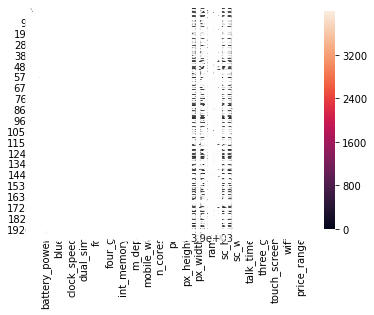

In [6]:
sns.heatmap(data, annot=True,linewidths=2)

In [7]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
